In [285]:
import pandas as pd
import pylab as pl
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import statsmodels.formula.api as sm
import scipy.stats as stats
import pandas_profiling 
from matplotlib.backends.backend_pdf import PdfPages

from sklearn.cross_validation import train_test_split
from sklearn import metrics



# Importing credit card data

In [286]:
CCD = pd.read_csv('C:\\Users\\HP\\Desktop\\AnalytixLabs\\Machine Learning\\Final Case Study 1 - Credit Card Segmentation\\Credit-Card-Customers-Segmentation\\CC GENERAL.csv')
CCD.head(10)


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


In [287]:
CCD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

In [288]:
print (CCD.isnull().sum())

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


In [289]:
CCD['CREDIT_LIMIT'].fillna(CCD['CREDIT_LIMIT'].median(),inplace=True)
CCD['MINIMUM_PAYMENTS'].fillna(CCD['MINIMUM_PAYMENTS'].median(),inplace=True)
print (CCD.isnull().sum())

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64


In [290]:
# pandas_profiling.ProfileReport(CCD)

# Calculating KPI's

Monthly average purchase=Total purchase amount spent during last 12 months/Number of months as a customer
cash advance amount=Total cash-advance amount/Number of months as a customer

In [291]:
CCD['MONTHLY_AVG_PURCHASE'] = CCD['PURCHASES']/CCD['TENURE']
CCD['MONTHLY_AVG_CASH_ADVANCE'] = CCD['CASH_ADVANCE']/CCD['TENURE']

Purchases by type (one-off, installments)

In [292]:
CCD['PURCHASE_TYPE_OFF_PAY'] = np.where(CCD['ONEOFF_PURCHASES']>0,1,0)
CCD['PURCHASE_TYPE_INSTALLMENT'] = np.where(CCD['INSTALLMENTS_PURCHASES']>0,1,0)

Average amount per purchase and cash advance transaction

In [293]:
CCD['AVG_AMT_PER_PURCHASE'] = CCD['PURCHASES']/CCD['PURCHASES_TRX']
CCD['AVG_CASH_ADVANCE'] = CCD['CASH_ADVANCE']/CCD['PURCHASES_TRX']

Limit usage (balance to credit limit ratio)

In [294]:
CCD['LIMIT_USAGE'] = np.where(CCD['CREDIT_LIMIT']== 0, 0,CCD['BALANCE']/CCD['CREDIT_LIMIT'])

Payments to minimum payments ratio etc.

In [295]:
CCD['PAYMENT_RATIO'] = np.where(CCD['MINIMUM_PAYMENTS']== 0, 0, CCD['PAYMENTS']/CCD['MINIMUM_PAYMENTS'])

In [296]:
CCD=CCD.drop(['CUST_ID'], axis=1)

In [297]:
KPI=CCD[['MONTHLY_AVG_PURCHASE','MONTHLY_AVG_CASH_ADVANCE','PURCHASE_TYPE_OFF_PAY','PURCHASE_TYPE_INSTALLMENT','AVG_AMT_PER_PURCHASE',
        'AVG_CASH_ADVANCE','LIMIT_USAGE','PAYMENT_RATIO']]

In [298]:
CCD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 25 columns):
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8950 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS                    8950 non-null float64
PRC_FULL_PAYMENT           

In [299]:
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

num_summary=CCD.apply(lambda x: var_summary(x)).T
num_summary.to_csv('num_summary.csv')
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
BALANCE,8950.0,0.0,1.400205e+07,1564.474828,873.385231,2081.531879,4.332775e+06,0.000000,0.065101,8.814518,23.575529,128.281915,873.385231,2054.140036,4338.563657,5.909112e+03,9.338805e+03,1.904314e+04
BALANCE_FREQUENCY,8950.0,0.0,7.851573e+03,0.877271,1.000000,0.236904,5.612351e-02,0.000000,0.090909,0.272727,0.454545,0.888889,1.000000,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000e+00
PURCHASES,8950.0,0.0,8.978683e+06,1003.204834,361.280000,2136.634782,4.565208e+06,0.000000,0.000000,0.000000,0.000000,39.635000,361.280000,1110.130000,2542.624000,3.998619e+03,8.977290e+03,4.903957e+04
ONEOFF_PURCHASES,8950.0,0.0,5.302314e+06,592.437371,38.000000,1659.887917,2.755228e+06,0.000000,0.000000,0.000000,0.000000,0.000000,38.000000,577.405000,1600.099000,2.671094e+03,6.689898e+03,4.076125e+04
INSTALLMENTS_PURCHASES,8950.0,0.0,3.679055e+06,411.067645,89.000000,904.338115,8.178274e+05,0.000000,0.000000,0.000000,0.000000,0.000000,89.000000,468.637500,1140.070000,1.750087e+03,3.886241e+03,2.250000e+04
CASH_ADVANCE,8950.0,0.0,8.760896e+06,978.871112,0.000000,2097.163877,4.398096e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1113.821139,3065.534560,4.647169e+03,9.588163e+03,4.713721e+04
PURCHASES_FREQUENCY,8950.0,0.0,4.388637e+03,0.490351,0.500000,0.401371,1.610985e-01,0.000000,0.000000,0.000000,0.000000,0.083333,0.500000,0.916667,1.000000,1.000000e+00,1.000000e+00,1.000000e+00
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.0,1.811996e+03,0.202458,0.083333,0.298336,8.900441e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.300000,0.750000,1.000000e+00,1.000000e+00,1.000000e+00
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.0,3.261714e+03,0.364437,0.166667,0.397448,1.579647e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.750000,1.000000,1.000000e+00,1.000000e+00,1.000000e+00
CASH_ADVANCE_FREQUENCY,8950.0,0.0,1.209541e+03,0.135144,0.000000,0.200121,4.004857e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.222222,0.416667,5.833330e-01,8.333330e-01,1.500000e+00


In [300]:
CCD["AVG_AMT_PER_PURCHASE"]=CCD.AVG_AMT_PER_PURCHASE.replace([np.inf,np.nan],0)#CCD["AVG_AMT_PER_PURCHASE"].median)
CCD["AVG_CASH_ADVANCE"]=CCD.AVG_CASH_ADVANCE.replace([np.inf, np.nan],0)#CCD["AVG_CASH_ADVANCE"].median)

##### Extreme value Treatment
- Since there are variables having extreme values, I am doing log-transformation on the dataset to remove outlier effect 

In [301]:
# log tranformation
#CCD=CCD.applymap(lambda x: np.log(x+1))

In [302]:
#num_summary=CCD.apply(lambda x: var_summary(x)).T
#num_summary

In [303]:
#col=['BALANCE','PURCHASES','CASH_ADVANCE','TENURE','PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT','CREDIT_LIMIT']
#CCD=CCD[[x for x in CCD.columns if x not in col ]]

array([23.83, 42.14, 50.63, 57.72, 63.28, 67.77, 71.97, 75.93, 79.45,
       82.47, 85.35, 88.08, 90.48, 92.54, 94.24, 95.5 , 96.58])

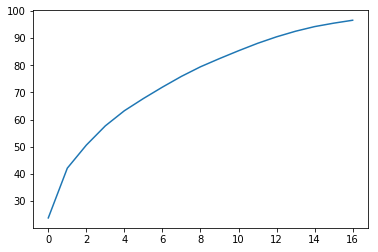

In [304]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
ccd_scaled=sc.fit_transform(CCD)
ccd_scaled
pc = PCA(n_components=17)
pc.fit(ccd_scaled)
var= pc.explained_variance_ratio_
var1=np.cumsum(np.round(pc.explained_variance_ratio_, decimals=4)*100)
plt.plot(var1)
var1

In [305]:
pc_final=PCA(n_components=6).fit(ccd_scaled)
reduced_cr=pc_final.fit_transform(ccd_scaled)
pd.DataFrame(reduced_cr).head(5)

,0,1,2,3,4,5
0,-1.334788,-1.800183,0.110894,-0.168984,0.755391,0.197645
1,-2.191348,2.874825,0.077790,-1.148661,0.800262,0.690125
2,0.829348,-0.241292,1.091025,1.474086,-2.283485,0.504405
3,0.098633,0.089560,5.187895,0.322848,0.030074,1.951755
4,-1.571958,-0.789399,1.008541,1.598007,-0.379549,-0.176929


In [306]:
Loadings =  pd.DataFrame((pc_final.components_.T * np.sqrt(pc_final.explained_variance_)).T,columns=CCD.columns).T
Loadings.to_csv("Loadings.csv")

In [307]:
CCD_new=CCD[["MONTHLY_AVG_CASH_ADVANCE","MONTHLY_AVG_PURCHASE","PAYMENT_RATIO","PURCHASE_TYPE_OFF_PAY",
          "PURCHASE_TYPE_INSTALLMENT","LIMIT_USAGE","AVG_AMT_PER_PURCHASE",]]

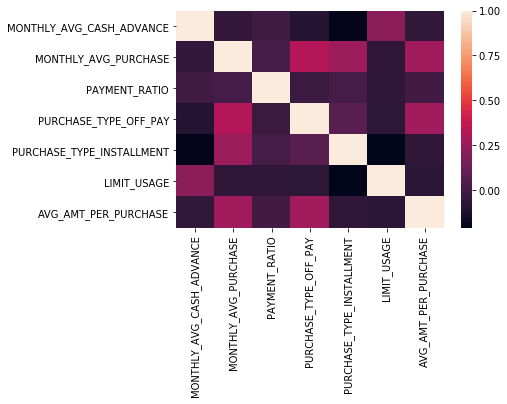

In [308]:

sns.heatmap(CCD_new.corr())

# Evaluating the optimum no. of clusters

In [309]:
from sklearn.metrics import silhouette_score, calinski_harabaz_score
from sklearn.cluster import KMeans

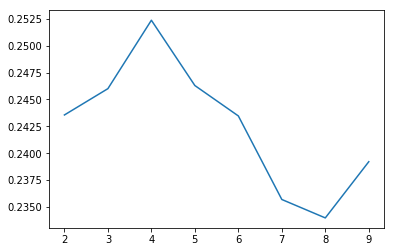

In [310]:
score={}
score_c={}
for n in range(2,10):
    km_score=KMeans(n_clusters=n)
    km_score.fit(reduced_cr)
    score_c[n]=calinski_harabaz_score(reduced_cr,km_score.labels_)
    score[n]=silhouette_score(reduced_cr,km_score.labels_)
    
pd.Series(score).plot()


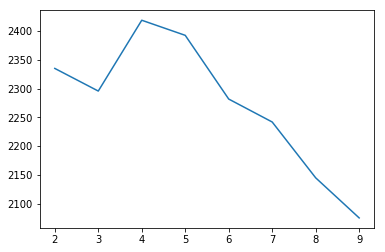

In [311]:
pd.Series(score_c).plot()

Optimum number of cluster is 4 (by silhouette_score)

Text(0,0.5,'PC_2')

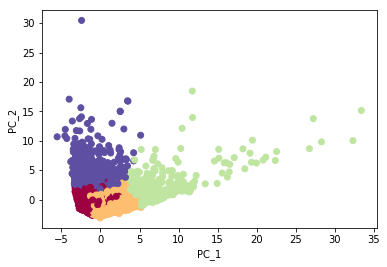

In [319]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit_transform(CCD)
pc = PCA(n_components=7, random_state=125).fit_transform(sc)
from sklearn.cluster import KMeans, DBSCAN
km = KMeans(n_clusters=4, random_state=185).fit(pc)
plt.scatter(pc[:,0], pc[:,1],c=km.labels_, cmap='Spectral')
plt.xlabel('PC_1')
plt.ylabel('PC_2')

In [320]:
km = KMeans(n_clusters=4, random_state=125).fit(pc)
CCD_new['cluster']=km.labels_
CCD_new.groupby('cluster').mean().T

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


cluster,0,1,2,3
MONTHLY_AVG_CASH_ADVANCE,62.913760,18.478444,471.206070,55.863500
MONTHLY_AVG_PURCHASE,22.629422,94.939496,46.686058,652.988354
PAYMENT_RATIO,7.447785,10.811001,5.505557,15.002515
PURCHASE_TYPE_OFF_PAY,0.434989,0.560426,0.474206,0.970803
PURCHASE_TYPE_INSTALLMENT,0.156250,0.950342,0.345238,0.912409
LIMIT_USAGE,0.455766,0.268770,0.630345,0.366953
AVG_AMT_PER_PURCHASE,81.183769,61.418179,59.332019,165.342477


In [321]:
# No. of customers in the cluster
CCD_new['cluster'].value_counts()

1    3947
0    3584
2    1008
3     411
Name: cluster, dtype: int64

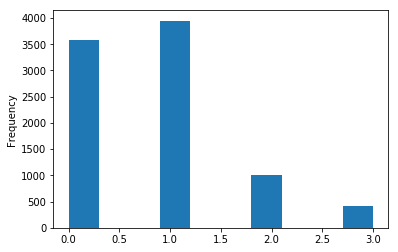

In [322]:
CCD_new['cluster'].plot.hist()

C:\Users\HP\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\HP\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


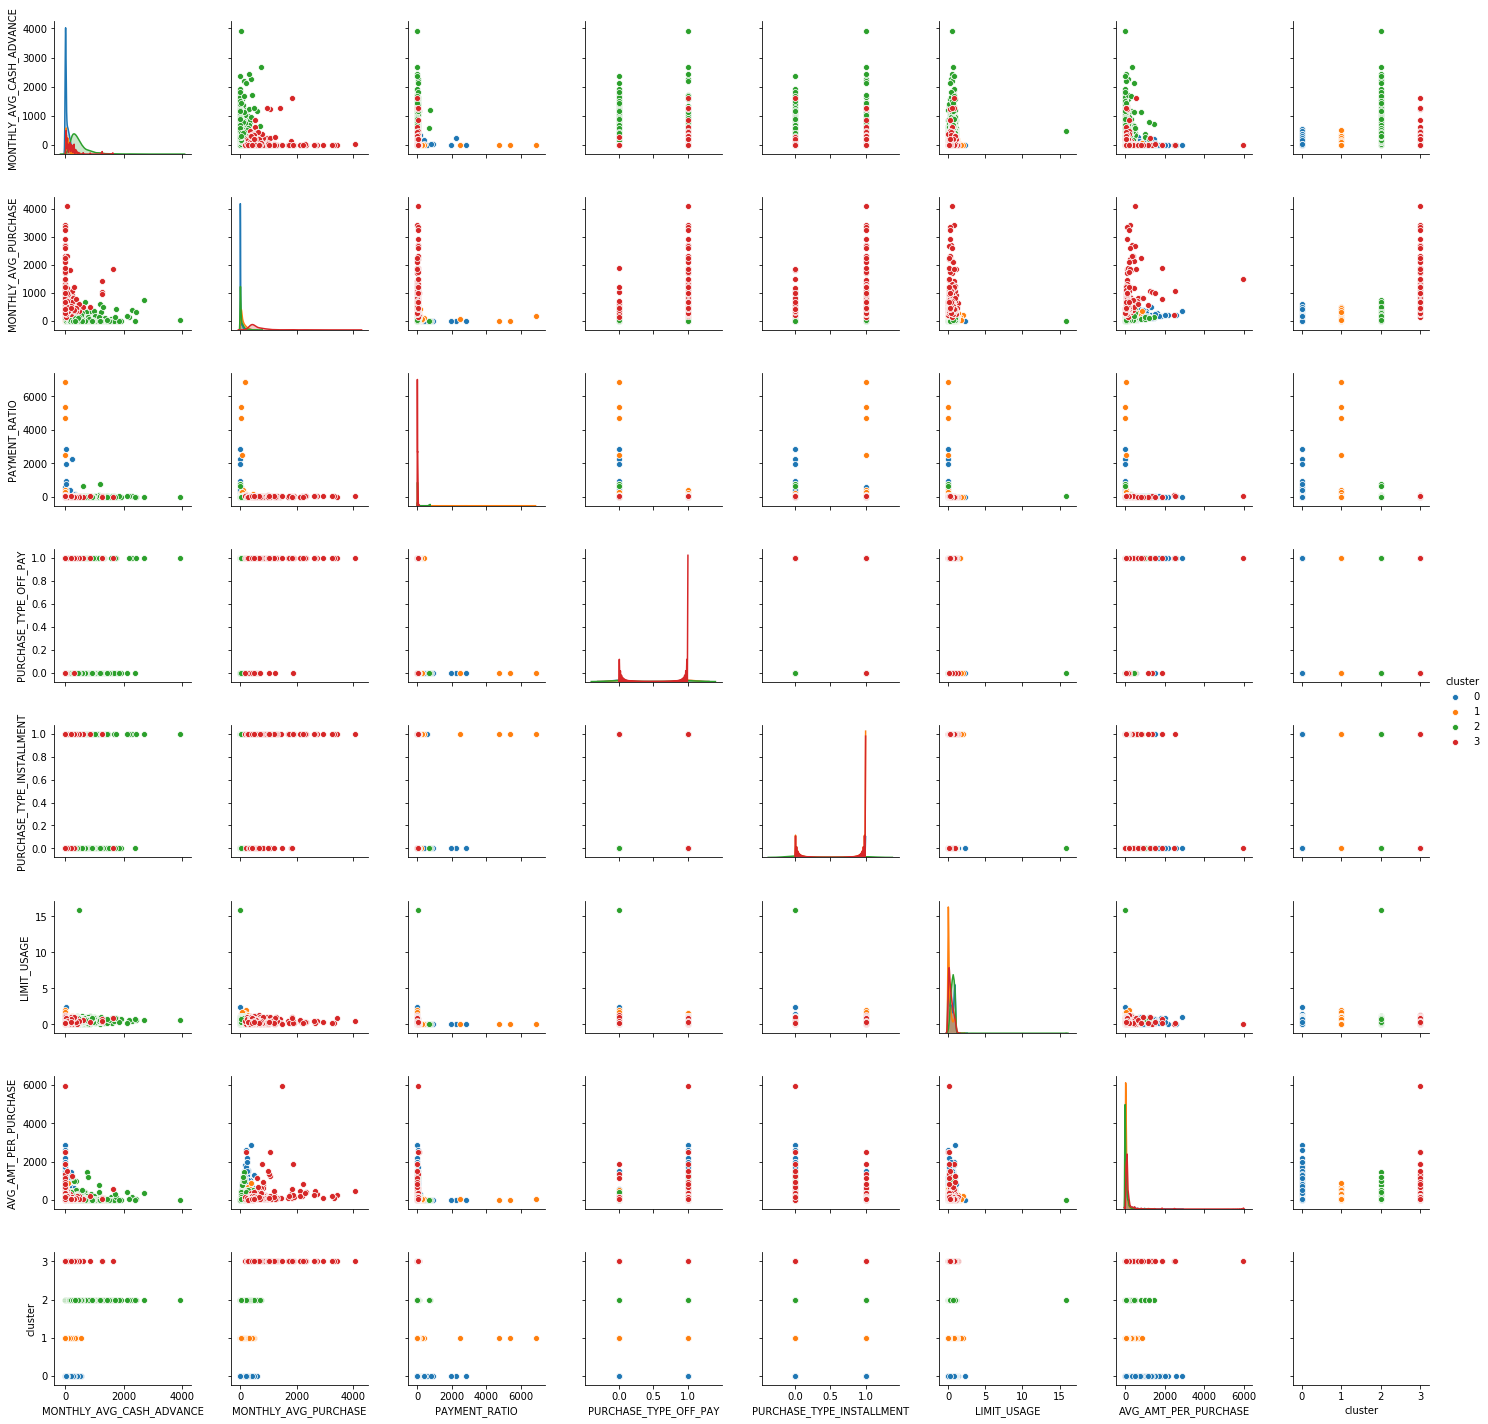

In [323]:
sns.pairplot( CCD_new ,hue='cluster')

In [270]:
# Mean value gives a good indication of the distribution of data. So we are finding mean value for each variable for each cluster
cluster_4=CCD_new.groupby('cluster').mean().T

cluster_4

cluster,0,1,2,3
MONTHLY_AVG_CASH_ADVANCE,62.913760,18.478444,471.206070,55.863500
MONTHLY_AVG_PURCHASE,22.629422,94.939496,46.686058,652.988354
PAYMENT_RATIO,7.447785,10.811001,5.505557,15.002515
PURCHASE_TYPE_OFF_PAY,0.434989,0.560426,0.474206,0.970803
PURCHASE_TYPE_INSTALLMENT,0.156250,0.950342,0.345238,0.912409
LIMIT_USAGE,0.455766,0.268770,0.630345,0.366953
AVG_AMT_PER_PURCHASE,81.183769,61.418179,59.332019,165.342477


In [271]:
# log tranformation
cluster_4=cluster_4.applymap(lambda x: np.log(x+1))

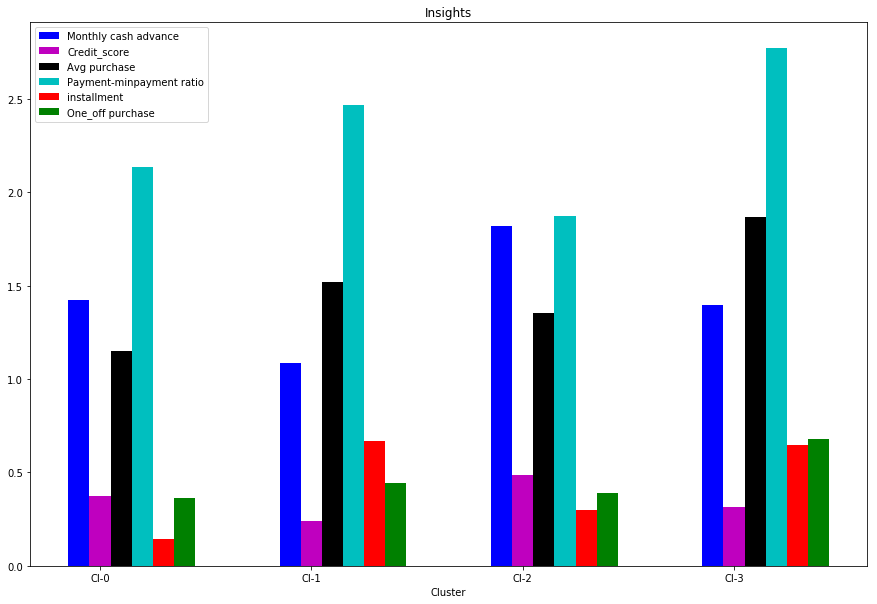

In [282]:
fig,ax=plt.subplots(figsize=(15,10))
index=np.arange(len(cluster_4.columns))

cash_advance=np.log(cluster_4.loc['MONTHLY_AVG_CASH_ADVANCE',:].values)
credit_score=(cluster_4.loc['LIMIT_USAGE',:].values)
purchase= np.log(cluster_4.loc['MONTHLY_AVG_PURCHASE',:].values)
payment=cluster_4.loc['PAYMENT_RATIO',:].values
installment=cluster_4.loc['PURCHASE_TYPE_INSTALLMENT',:].values
one_off=cluster_4.loc['PURCHASE_TYPE_OFF_PAY',:].values


bar_width=.10
b1=plt.bar(index,cash_advance,color='b',label='Monthly cash advance',width=bar_width)
b2=plt.bar(index+bar_width,credit_score,color='m',label='Credit_score',width=bar_width)
b3=plt.bar(index+2*bar_width,purchase,color='k',label='Avg purchase',width=bar_width)
b4=plt.bar(index+3*bar_width,payment,color='c',label='Payment-minpayment ratio',width=bar_width)
b5=plt.bar(index+4*bar_width,installment,color='r',label='installment',width=bar_width)
b6=plt.bar(index+5*bar_width,one_off,color='g',label='One_off purchase',width=bar_width)

plt.xlabel("Cluster")
plt.title("Insights")
plt.xticks(index + bar_width, ('Cl-0', 'Cl-1', 'Cl-2', 'Cl-3'))
plt.legend()

## Performance metrics suggest that  K-means with 4 cluster is able to show distinguished characteristics of each cluster.




<big>
*** Insights with 4 Clusters ***



---

<big>


- Cluster 0 customers are doing maximum One_Off transactions and has least payment ratio amongst all the cluster.



- Cluster 1 is the group of customers who have highest Monthly cash advance and doing both installment as well as one_off   purchases, have comparatively good credit score but have poor average purchase score.



- Cluster 2 customers have maximum Average Purchase and good Monthly cash advance but this cluster doesn't do installment or one_off purchases.



- cluster 3 is doing maximum installment, has maximum payment too min_payment ratio and doesn't do one-off purchases

---





In [279]:
CCD = pd.read_csv('C:\\Users\\HP\\Desktop\\AnalytixLabs\\Machine Learning\\Final Case Study 1 - Credit Card Segmentation\\Credit-Card-Customers-Segmentation\\CC GENERAL.csv')
CCD= pd.concat([pd.DataFrame(CCD.iloc[:,0], columns=['CUST_ID']), KPI,CCD_new.cluster], axis=1)

In [280]:
CCD

,CUST_ID,MONTHLY_AVG_PURCHASE,MONTHLY_AVG_CASH_ADVANCE,PURCHASE_TYPE_OFF_PAY,PURCHASE_TYPE_INSTALLMENT,AVG_AMT_PER_PURCHASE,AVG_CASH_ADVANCE,LIMIT_USAGE,PAYMENT_RATIO,cluster
0,C10001,7.950000,0.000000,0,1,47.700000,0.000000,0.040901,1.446508,0
1,C10002,0.000000,536.912124,0,0,NaN,inf,0.457495,3.826241,2
2,C10003,64.430833,0.000000,1,0,64.430833,0.000000,0.332687,0.991682,1
3,C10004,124.916667,17.149001,1,0,1499.000000,205.788017,0.222223,0.000000,0
4,C10005,1.333333,0.000000,1,0,16.000000,0.000000,0.681429,2.771075,0
5,C10006,111.106667,0.000000,0,1,166.660000,0.000000,1.005460,0.581601,1
6,C10007,590.917500,0.000000,1,1,110.797031,0.000000,0.046464,32.081820,3
7,C10008,36.350000,0.000000,0,1,36.350000,0.000000,0.792892,1.276357,1
8,C10009,71.790833,0.000000,1,1,172.298000,0.000000,0.144989,2.206280,1
9,C10010,106.800000,0.000000,1,0,427.200000,0.000000,0.013839,11.612605,0


In [281]:
CCD.to_csv('customers_segment.csv', index=0)

# Marketing Strategy Suggested:

## a. Group 2
   - They are potential target customers who are paying dues and doing purchases and maintaining comparatively good credit score )
       --    we can increase credit limit or can lower down interest rate
       --    Can be given premium card /loyality cards to increase transactions
       
## b. Group 1
   - They have poor credit score and taking only cash on advance. We can target them by providing  less interest rate on purchase transaction
   
## c. Group 0
   - This group is has minimum paying ratio and using card for just oneoff transactions (may be for utility bills only). This group seems to be risky group.
   
## d. Group 3
  - This group is performing best among all as cutomers are maintaining good credit score and paying dues on time.
      -- Giving rewards point will make them perform more purchases.
       
